In [ ]:
# Steps

1. Scrape the Data
2. Data Cleaning
3. Convert your data into DataFrame
4. Perform the Data Analysis - Data Cleaning, Data Exploration, Data Manipulation, Data Viosualization
5. Perform the EDA (Exploratory Data Analysis)

# Performing the Data Scraping from the WEB

Link: https://sofifa.com/players

In [ ]:
columns = ['IMAGE_LINK', 'NAME', 'AGE', 'OVA', 'POT', 'TEAM',
           'DURATION', 'VALUE', 'WAGE', 'TOTAL_STATS']

In [ ]:
https://sofifa.com/players?offset=0
https://sofifa.com/players?offset=60
https://sofifa.com/players?offset=120
https://sofifa.com/players?offset=180
https://sofifa.com/players?offset=240
https://sofifa.com/players?offset=300
https://sofifa.com/players?offset=360
https://sofifa.com/players?offset=420
https://sofifa.com/players?offset=480
https://sofifa.com/players?offset=540

In [ ]:
for i in range(0,541,60):
  print(f'https://sofifa.com/players?offset={i}')

https://sofifa.com/players?offset=0
https://sofifa.com/players?offset=60
https://sofifa.com/players?offset=120
https://sofifa.com/players?offset=180
https://sofifa.com/players?offset=240
https://sofifa.com/players?offset=300
https://sofifa.com/players?offset=360
https://sofifa.com/players?offset=420
https://sofifa.com/players?offset=480
https://sofifa.com/players?offset=540


# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup
import requests

In [ ]:

url = 'https://sofifa.com/players?offset=0'
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/109.0"}

In [ ]:
req = requests.get(url,headers=headers)

In [ ]:
req.status_code

200

In [ ]:
soup = BeautifulSoup(req.content)

In [ ]:
soup.prettify()

'<!DOCTYPE html>\n<html lang="en-US">\n <head id="head">\n  <title>\n   Players FIFA 23 Feb 28, 2023 SoFIFA\n  </title>\n  <meta charset="utf-8"/>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <meta content="VGaFvm9Qm-qhCd2LCDi8QKWXNPSrVE2SJ2iT8c3vI1g" name="google-site-verification"/>\n  <meta content="FIFA 23 player ratings on Feb 28, 2023" name="description"/>\n  <meta content="2009 - 2023 SoFIFA.com" name="copyright"/>\n  <meta content="light" name="twitter:widgets:theme"/>\n  <meta content="#e6e6e6" name="twitter:widgets:border-color"/>\n  <link href="https://static.sofifa.net/launcher-icon.png" rel="shortcut icon"/>\n  <link href="https://static.sofifa.net/launcher-icon.png" rel="apple-touch-icon"/>\n  <script>\n   window.ramp = window.ramp || {};window.ramp.que = window.ramp.que || [];\n  </script>\n  <link href="https://sofifa.com/players?hl=en-US" hreflang="en" rel="alternate"/>\n  <link href="https://sofifa.com/players?hl=fr-FR" hreflang="fr" rel

In [ ]:
arr = [i for i in soup.findAll('tr')]

In [ ]:
del arr[0]

In [ ]:

# Image Link
re.sub('^<img.*data-srcset="| .*/>', '' , str(arr[0].find('img',{"class": "player-check"})))

'https://cdn.sofifa.net/players/271/668/23_120.png'

In [ ]:
arr[0].find('a', {"role":"tooltip"})

<a aria-label="Xavier Simons" data-tip-pos="top" href="/player/271668/xavier-simons/230017/" role="tooltip"><div class="ellipsis">X. Simons</div></a>

In [ ]:
# Name
re.sub('^<a.*">|<.*>', '', str(arr[0].find('a', {"role":"tooltip"})))

'X. Simons'

In [ ]:
# Age
re.sub('^<td.*">|<.*>', '', str(arr[0].find('td', {"class":"col"})))

'19'

In [ ]:
# OVA
re.sub('^<td.*">|<.*>', '', str(arr[0].find('td', {"class":"col col-oa"})))

'62'

In [ ]:

# POT
re.sub('^<td.*">|<.*>', '', str(arr[0].find('td', {"class":"col col-pt"})))

'78'

In [ ]:
# Team
re.sub('<a.*">|<.*>', '', str(arr[0].findAll('a')[-1]))

'Hull City'

In [ ]:
# Duration
re.sub('<div.*\n|<.*>', '', str(arr[0].find('div', {"class": "sub"})))

'2021 ~ 2023'

In [ ]:

# Value
re.sub('^<td.*">€|<.*>', '', str(arr[0].find('td', {"class": "col col-vl"})))

'975K'

In [ ]:
# Wage
re.sub('^<td.*">€|<.*>', '', str(arr[0].find('td', {"class": "col col-wg"})))

'2K'

In [ ]:
# Total Stats
re.sub('^<td.*">|<.*>', '', str(arr[0].find('td', {"class": "col col-tt"})))

'1680'

In [ ]:
columns = ['IMAGE_LINK', 'NAME', 'AGE', 'OVA', 'POT', 'TEAM',
           'DURATION', 'VALUE', 'WAGE', 'TOTAL_STATS']

In [ ]:
fifa_final = pd.DataFrame()

for i in range(0,541,60):
  url = f'https://sofifa.com/players?offset={i}'
  headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/109.0"}
  req = requests.get(url,headers=headers)
  if req.status_code == 200:
    soup = BeautifulSoup(req.content)
    lists = [[] for _ in range(10)]

    for i in soup.findAll('tr'):
      Image_Link = re.sub('^<img.*data-srcset="| .*/>', '' , str(i.find('img',{"class": "player-check"})))
      Name = re.sub('^<a.*">|<.*>', '', str(i.find('a', {"role":"tooltip"})))
      Age = re.sub('^<td.*">|<.*>', '', str(i.find('td', {"class":"col"})))
      OVA = re.sub('^<td.*">|<.*>', '', str(i.find('td', {"class":"col col-oa"})))
      POT = re.sub('^<td.*">|<.*>', '', str(i.find('td', {"class":"col col-pt"})))
      Team = re.sub('<a.*">|<.*>', '', str(i.findAll('a')[-1]))
      Duration = re.sub('<div.*\n|<.*>', '', str(i.find('div', {"class": "sub"})))
      Value = re.sub('^<td.*">€|<.*>', '', str(i.find('td', {"class": "col col-vl"})))
      Wage = re.sub('^<td.*">€|<.*>', '', str(i.find('td', {"class": "col col-wg"})))
      Total_stats = re.sub('^<td.*">|<.*>', '', str(i.find('td', {"class": "col col-tt"})))


      lists[0].append(Image_Link)
      lists[1].append(Name)
      lists[2].append(Age)
      lists[3].append(OVA)
      lists[4].append(POT)
      lists[5].append(Team)
      lists[6].append(Duration)
      lists[7].append(Value)
      lists[8].append(Wage)
      lists[9].append(Total_stats)


  fifa = pd.DataFrame({"Image_link":lists[0],
                      "Name": lists[1],
                      "Age": lists[2],
                      "OVA": lists[3],
                      "POT": lists[4],
                      "Team": lists[5],
                      "Duration": lists[6],
                      "Value": lists[7],
                      "Wage": lists[8],
                      "Total_stats": lists[9]})

  fifa.drop(0, inplace=True)    # inplace = true -> permenent deletion

  fifa['Age'] = pd.to_numeric(fifa['Age'])   # changing to numeric using numeric function
  fifa['OVA'] = pd.to_numeric(fifa['OVA'])
  fifa['POT'] = pd.to_numeric(fifa['POT'])
  fifa['Total_stats'] = pd.to_numeric(fifa['Total_stats'])



  fifa_final = fifa_final.append(fifa, ignore_index=True)

In [ ]:
fifa_final.head()

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
0,https://cdn.sofifa.net/players/271/668/23_120.png,X. Simons,19,62,78,Hull City,2021 ~ 2023,975K,2K,1680
1,https://cdn.sofifa.net/players/273/990/23_120.png,Jeffinho,22,73,82,Olympique Lyonnais,2023 ~ 2027,7M,41K,1687
2,https://cdn.sofifa.net/players/233/795/23_120.png,B. Brereton Díaz,23,75,82,Blackburn Rovers,2019 ~ 2023,11.5M,38K,1894
3,https://cdn.sofifa.net/players/261/417/23_120.png,K. Mier,22,73,84,Atlético Nacional,2019 ~ 2025,6M,3K,1101
4,https://cdn.sofifa.net/players/246/791/23_120.png,M. Solomon,22,76,83,Fulham,"Jun 30, 2023",15M,900,1859


In [ ]:
fifa_final.tail(10)

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
590,https://cdn.sofifa.net/players/266/815/23_120.png,B. Doak,16,62,84,Liverpool,2022 ~ 2026,1.2M,3K,1454
591,https://cdn.sofifa.net/players/268/312/23_120.png,S. Kumbedi,17,64,80,Olympique Lyonnais,2022 ~ 2025,1.4M,500,1617
592,https://cdn.sofifa.net/players/270/039/23_120.png,Diego Moreira,17,67,85,Benfica,2022 ~ 2024,2.5M,600,1668
593,https://cdn.sofifa.net/players/270/390/23_120.png,Marquinhos,19,73,84,Norwich City,"Jun 30, 2023",6.5M,30K,1705
594,https://cdn.sofifa.net/players/270/579/23_120.png,W. Odobert,17,67,81,Troyes,2022 ~ 2027,2.3M,850,1528
595,https://cdn.sofifa.net/players/272/379/23_120.png,S. Iling-Junior,18,69,85,Juventus,2022 ~ 2025,3.5M,13K,1697
596,https://cdn.sofifa.net/players/272/445/23_120.png,Álvaro,17,62,81,Real Madrid,2021 ~ 2027,1M,4K,1498
597,https://cdn.sofifa.net/players/272/449/23_120.png,Pablo Barrios,19,66,84,Atlético Madrid,2022 ~ 2028,2.2M,7K,1789
598,https://cdn.sofifa.net/players/272/781/23_120.png,E. Ben Seghir,17,69,84,Monaco,2022 ~ 2025,3.2M,5K,1705
599,https://cdn.sofifa.net/players/273/463/23_120.png,João Gomes,21,76,85,Wolverhampton Wanderers,2023 ~ 2028,16M,43K,2019


In [ ]:
fifa_final.columns

Index(['Image_link', 'Name', 'Age', 'OVA', 'POT', 'Team', 'Duration', 'Value',
       'Wage', 'Total_stats'],
      dtype='object')

In [ ]:
len(fifa_final)

600

In [ ]:
len(fifa_final.columns)

10

In [ ]:
fifa_final.shape[1]

10

In [ ]:
fifa_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Image_link   600 non-null    object
 1   Name         600 non-null    object
 2   Age          600 non-null    int64 
 3   OVA          600 non-null    int64 
 4   POT          600 non-null    int64 
 5   Team         600 non-null    object
 6   Duration     600 non-null    object
 7   Value        600 non-null    object
 8   Wage         600 non-null    object
 9   Total_stats  600 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 47.0+ KB


In [ ]:
fifa_final.describe()

,Age,OVA,POT,Total_stats
count,600.000000,600.000000,600.000000,600.000000
mean,22.790000,76.676667,83.830000,1884.313333
std,4.176718,6.237813,3.710892,221.956880
min,16.000000,61.000000,67.000000,1044.000000
25%,20.000000,73.000000,82.000000,1753.000000
50%,22.000000,77.000000,84.000000,1901.000000
75%,25.000000,81.000000,86.000000,2044.750000
max,40.000000,91.000000,95.000000,2312.000000


In [ ]:
# How many null values are there in each column?
fifa_final.isna().sum()

Image_link     0
Name           0
Age            0
OVA            0
POT            0
Team           0
Duration       0
Value          0
Wage           0
Total_stats    0
dtype: int64

In [ ]:
# How many null values are there in a dataset?
fifa_final.isna().sum().sum()

0

In [ ]:
# Check for the Duplicate values?
fifa_final.duplicated().sum()

9

In [ ]:
# Show all the duplicated values
ff = fifa_final[fifa_final.duplicated()]
ff

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
61,https://cdn.sofifa.net/players/222/665/23_120.png,M. Ødegaard,23,85,89,Arsenal,2021 ~ 2026,77.5M,115K,2125
123,https://cdn.sofifa.net/players/232/756/23_120.png,F. Tomori,24,84,90,Milan,2021 ~ 2027,60.5M,75K,1875
205,https://cdn.sofifa.net/players/259/163/23_120.png,M. Hilgers,21,73,84,FC Twente,2020 ~ 2023,6.5M,8K,1710
248,https://cdn.sofifa.net/players/226/851/23_120.png,B. Pavard,26,81,83,FC Bayern München,2019 ~ 2024,29.5M,63K,2039
358,https://cdn.sofifa.net/players/255/001/23_120.png,N. Rovella,20,77,86,Monza,"Jun 30, 2023",23M,62K,2086
419,https://cdn.sofifa.net/players/272/569/23_120.png,K. Rodríguez,22,66,75,Independiente del Valle,2023 ~ 2024,1.9M,500,1623
433,https://cdn.sofifa.net/players/216/388/23_120.png,A. Saint-Maximin,25,81,83,Newcastle United,2019 ~ 2026,32.5M,105K,1915
489,https://cdn.sofifa.net/players/192/119/23_120.png,T. Courtois,30,90,91,Real Madrid,2018 ~ 2026,90M,250K,1334
540,https://cdn.sofifa.net/players/155/862/23_120.png,Sergio Ramos,36,84,84,Paris Saint Germain,2021 ~ 2023,7.5M,75K,2136


In [ ]:
ff1 = fifa_final[fifa_final.duplicated(keep = False)]
ff1

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
53,https://cdn.sofifa.net/players/222/665/23_120.png,M. Ødegaard,23,85,89,Arsenal,2021 ~ 2026,77.5M,115K,2125
61,https://cdn.sofifa.net/players/222/665/23_120.png,M. Ødegaard,23,85,89,Arsenal,2021 ~ 2026,77.5M,115K,2125
100,https://cdn.sofifa.net/players/232/756/23_120.png,F. Tomori,24,84,90,Milan,2021 ~ 2027,60.5M,75K,1875
123,https://cdn.sofifa.net/players/232/756/23_120.png,F. Tomori,24,84,90,Milan,2021 ~ 2027,60.5M,75K,1875
174,https://cdn.sofifa.net/players/259/163/23_120.png,M. Hilgers,21,73,84,FC Twente,2020 ~ 2023,6.5M,8K,1710
205,https://cdn.sofifa.net/players/259/163/23_120.png,M. Hilgers,21,73,84,FC Twente,2020 ~ 2023,6.5M,8K,1710
206,https://cdn.sofifa.net/players/226/851/23_120.png,B. Pavard,26,81,83,FC Bayern München,2019 ~ 2024,29.5M,63K,2039
248,https://cdn.sofifa.net/players/226/851/23_120.png,B. Pavard,26,81,83,FC Bayern München,2019 ~ 2024,29.5M,63K,2039
291,https://cdn.sofifa.net/players/255/001/23_120.png,N. Rovella,20,77,86,Monza,"Jun 30, 2023",23M,62K,2086
358,https://cdn.sofifa.net/players/255/001/23_120.png,N. Rovella,20,77,86,Monza,"Jun 30, 2023",23M,62K,2086


In [ ]:
# delete all duplicates values
fifa_final.drop_duplicates(inplace= True)

In [ ]:
fifa_final.shape

(591, 10)

In [ ]:
fifa_final.tail()

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
595,https://cdn.sofifa.net/players/272/379/23_120.png,S. Iling-Junior,18,69,85,Juventus,2022 ~ 2025,3.5M,13K,1697
596,https://cdn.sofifa.net/players/272/445/23_120.png,Álvaro,17,62,81,Real Madrid,2021 ~ 2027,1M,4K,1498
597,https://cdn.sofifa.net/players/272/449/23_120.png,Pablo Barrios,19,66,84,Atlético Madrid,2022 ~ 2028,2.2M,7K,1789
598,https://cdn.sofifa.net/players/272/781/23_120.png,E. Ben Seghir,17,69,84,Monaco,2022 ~ 2025,3.2M,5K,1705
599,https://cdn.sofifa.net/players/273/463/23_120.png,João Gomes,21,76,85,Wolverhampton Wanderers,2023 ~ 2028,16M,43K,2019


In [ ]:
fifa_final.reset_index(inplace = True)

In [ ]:
fifa_final.tail()

,index,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
586,595,https://cdn.sofifa.net/players/272/379/23_120.png,S. Iling-Junior,18,69,85,Juventus,2022 ~ 2025,3.5M,13K,1697
587,596,https://cdn.sofifa.net/players/272/445/23_120.png,Álvaro,17,62,81,Real Madrid,2021 ~ 2027,1M,4K,1498
588,597,https://cdn.sofifa.net/players/272/449/23_120.png,Pablo Barrios,19,66,84,Atlético Madrid,2022 ~ 2028,2.2M,7K,1789
589,598,https://cdn.sofifa.net/players/272/781/23_120.png,E. Ben Seghir,17,69,84,Monaco,2022 ~ 2025,3.2M,5K,1705
590,599,https://cdn.sofifa.net/players/273/463/23_120.png,João Gomes,21,76,85,Wolverhampton Wanderers,2023 ~ 2028,16M,43K,2019


In [ ]:
fifa_final.duplicated().sum()

0

In [ ]:
# Delete the columns - index, Image_link, Duration
fifa_final.drop(['index','Image_link','Duration'], axis = 1, inplace = True )

In [ ]:
fifa_final.drop('Team', axis = 'columns' )  # we can use 'columns' other than axis= 1

,Name,Age,OVA,POT,Value,Wage,Total_stats
0,X. Simons,19,62,78,975K,2K,1680
1,Jeffinho,22,73,82,7M,41K,1687
2,B. Brereton Díaz,23,75,82,11.5M,38K,1894
3,K. Mier,22,73,84,6M,3K,1101
4,M. Solomon,22,76,83,15M,900,1859
...,...,...,...,...,...,...,...
586,S. Iling-Junior,18,69,85,3.5M,13K,1697
587,Álvaro,17,62,81,1M,4K,1498
588,Pablo Barrios,19,66,84,2.2M,7K,1789
589,E. Ben Seghir,17,69,84,3.2M,5K,1705


1. Find all the (name) Player who is having the highest wage.

In [ ]:
# wrong  :fifa_final['Wage'].max()

2. List out the Top 10 Players according to their POT

In [ ]:
p = fifa_final.nlargest(10, 'POT')[['Name','POT']]
p

,Name,POT
54,K. Mbappé,95
87,E. Haaland,94
38,J. Musiala,92
61,Vinícius Jr.,92
133,F. de Jong,92
197,Pedri,92
32,F. Wirtz,91
35,L. Messi,91
39,J. Bellingham,91
104,D. Vlahović,91


In [ ]:
print(p['Name'].values)

['K. Mbappé' 'E. Haaland' 'J. Musiala' 'Vinícius Jr.' 'F. de Jong' 'Pedri'
 'F. Wirtz' 'L. Messi' 'J. Bellingham' 'D. Vlahović']


In [ ]:
p1 = fifa_final.sort_values(by = 'POT', ascending = False)[['Name']].head(10)
p1

,Name
54,K. Mbappé
87,E. Haaland
197,Pedri
38,J. Musiala
61,Vinícius Jr.
133,F. de Jong
124,F. Valverde
35,L. Messi
39,J. Bellingham
32,F. Wirtz


In [ ]:
print(p1['Name'].values)

['K. Mbappé' 'E. Haaland' 'Pedri' 'J. Musiala' 'Vinícius Jr.' 'F. de Jong'
 'F. Valverde' 'L. Messi' 'J. Bellingham' 'F. Wirtz']


3. Find out all the Youngest Players

In [ ]:
y = fifa_final[fifa_final['Age']==16].sort_values('Age',ascending= True)[['Name','Age']]
y

,Name,Age
151,R. Bardghji,16
471,G. Prestianni,16
578,O. Vargas,16
581,B. Doak,16


In [ ]:
print(y['Name'].values)

['R. Bardghji' 'G. Prestianni' 'O. Vargas' 'B. Doak']


In [ ]:
fifa_final.sort_values('Age',ascending=True)[['Name','Age']].head(10)

,Name,Age
471,G. Prestianni,16
151,R. Bardghji,16
578,O. Vargas,16
581,B. Doak,16
85,G. Kuol,17
49,M. Tel,17
83,A. Güler,17
236,K. Mainoo,17
74,N. Mbamba,17
472,A. Vermeeren,17


4. Find out all the Oldest Players

In [ ]:
oldest = fifa_final[fifa_final['Age']>=35].sort_values('Age',ascending= False)[['Name']]
print(oldest['Name'].values)

['Z. Ibrahimović' 'A. Talavera' 'Cristiano Ronaldo' 'Thiago Silva'
 'G. Ochoa' 'L. Modrić' 'Sergio Ramos' 'L. Messi' 'J. Vardy' 'L. Suárez'
 'O. Giroud' 'K. Navas']


In [ ]:
fifa_final.sort_values('Age',ascending= False)[['Name','Age']].head(10)

,Name,Age
296,Z. Ibrahimović,40
297,A. Talavera,39
298,Thiago Silva,37
31,Cristiano Ronaldo,37
178,G. Ochoa,36
300,L. Modrić,36
473,Sergio Ramos,36
475,O. Giroud,35
483,K. Navas,35
35,L. Messi,35


5. Plot a graph - First 10 player's Name Vs Player's POT

<BarContainer object of 10 artists>

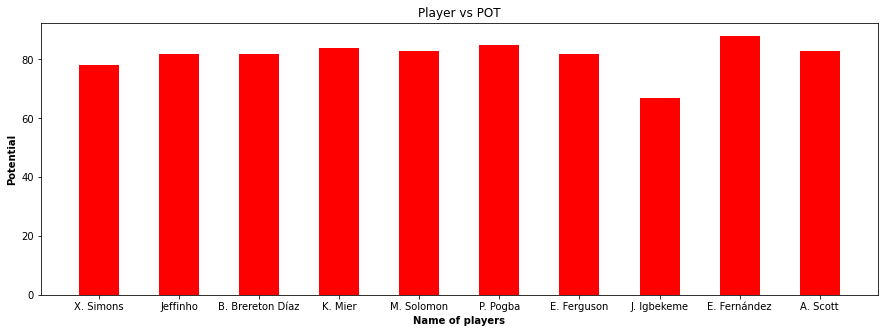

In [ ]:
x = fifa_final['Name'].head(10)
y = fifa_final['POT'].head(10)

plt.rcParams["figure.figsize"] = (15,5) # fig size increasing
plt.rcParams["figure.autolayout"] = True

# Naming the axes
plt.xlabel('Name of players', fontweight='bold', color = 'black', fontsize='10', horizontalalignment='center')
plt.ylabel('Potential', fontweight='bold', color = 'black', fontsize='10', horizontalalignment='center')
# naming title
plt.title('Player vs POT')

# plotting the graph
plt.bar(x,y,color = 'red',width= 0.5)

6. Plot a graph - First 10 player's Name Vs Player's Wage

Text(0.5, 1.0, 'Player vs Wage')

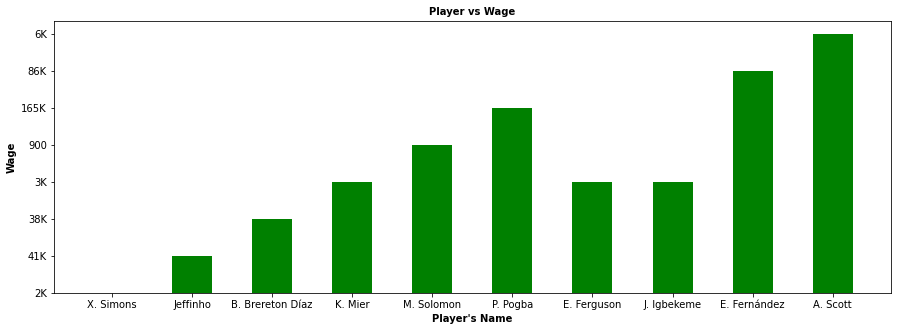

In [ ]:
x = fifa_final['Name'].head(10)
y = fifa_final['Wage'].head(10)

plt.bar(x,y, color= 'green', width=0.5)

plt.xlabel("Player's Name",fontweight='bold', color = 'black', fontsize='10', horizontalalignment='center')
plt.ylabel('Wage',fontweight='bold', color = 'black', fontsize='10', horizontalalignment='center')

plt.title('Player vs Wage',fontweight='bold', color = 'black', fontsize='10', horizontalalignment='center')



7. Find the Player(s) whose potential is more than 90

In [ ]:
print(fifa_final[fifa_final['POT']>90]['Name'].values)


['F. Wirtz' 'L. Messi' 'J. Musiala' 'J. Bellingham' 'K. Mbappé'
 'Vinícius Jr.' 'E. Haaland' 'D. Vlahović' 'F. Valverde' 'F. de Jong'
 'K. De Bruyne' 'Rúben Dias' 'Pedri' 'K. Benzema' 'T. Courtois']


8. Find the Player(s) whose potential is more than 90 but the age < 20

In [ ]:
df = fifa_final[fifa_final['POT']>90]

print(df[df['Age']<20]['Name'].values)


['F. Wirtz' 'J. Musiala' 'J. Bellingham' 'Pedri']


In [ ]:
fifa_final.corr()

,Age,OVA,POT,Total_stats
Age,1.000000,0.659420,-0.125244,0.366479
OVA,0.659420,1.000000,0.511315,0.591972
POT,-0.125244,0.511315,1.000000,0.271886
Total_stats,0.366479,0.591972,0.271886,1.000000


<AxesSubplot:>

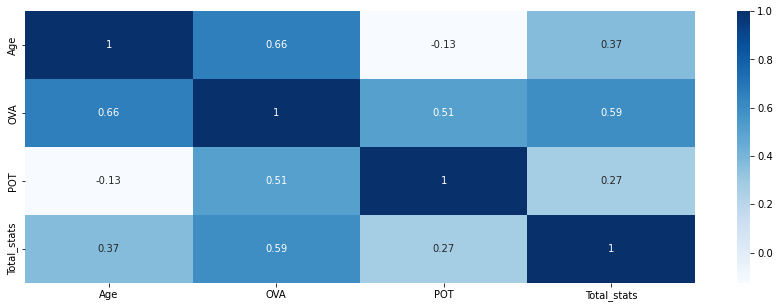

In [ ]:
sns.heatmap(fifa_final.corr(), annot=True, cmap='Blues')